In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

data = pd.read_csv('data.csv', engine='python', encoding='CP949')
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
layer_height          50 non-null float64
wall_thickness        50 non-null int64
infill_density        50 non-null int64
infill_pattern        50 non-null object
nozzle_temperature    50 non-null int64
bed_temperature       50 non-null int64
print_speed           50 non-null int64
material              50 non-null object
fan_speed             50 non-null int64
roughness             50 non-null int64
tension_strenght      50 non-null int64
elongation            50 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Pandas
import pandas as pd

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

AttributeError: module 'pandas' has no attribute '_libs'

In [9]:
corr = data.corr(method = 'pearson')
corr

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000e+00,-0.192571,3.498560e-03,-1.780545e-17,-4.925818e-18,-0.055501,7.881309e-18,0.801341,0.338230,0.507583
wall_thickness,-1.925714e-01,1.000000,1.025762e-01,-1.184929e-01,-2.932662e-02,-0.419531,-2.932662e-02,-0.226987,0.399849,0.176364
infill_density,3.498560e-03,0.102576,1.000000e+00,2.386137e-01,1.600823e-18,-0.094304,2.561317e-18,0.118389,0.358464,0.159009
nozzle_temperature,-1.780545e-17,-0.118493,2.386137e-01,1.000000e+00,6.024534e-01,0.000000,6.024534e-01,0.348611,-0.405908,-0.527447
bed_temperature,-4.925818e-18,-0.029327,1.600823e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
print_speed,-5.550085e-02,-0.419531,-9.430408e-02,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.121066,-0.264590,-0.234052
fan_speed,7.881309e-18,-0.029327,2.561317e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
roughness,8.013409e-01,-0.226987,1.183890e-01,3.486108e-01,1.921416e-01,0.121066,1.921416e-01,1.000000,0.051617,0.098962
tension_strenght,3.382296e-01,0.399849,3.584644e-01,-4.059076e-01,-2.528832e-01,-0.264590,-2.528832e-01,0.051617,1.000000,0.838109
elongation,5.075830e-01,0.176364,1.590088e-01,-5.274466e-01,-3.008708e-01,-0.234052,-3.008708e-01,0.098962,0.838109,1.000000


In [20]:
number_data = data.loc[:,["layer_height",	"wall_thickness",	"infill_density",	"nozzle_temperature",
                      "bed_temperature",	"print_speed",	"fan_speed",	"roughness"]
]
corr_mat = number_data.corr()
abs_corr_matrix = np.abs(corr_mat)

Saving figure print_corr_pearson.png


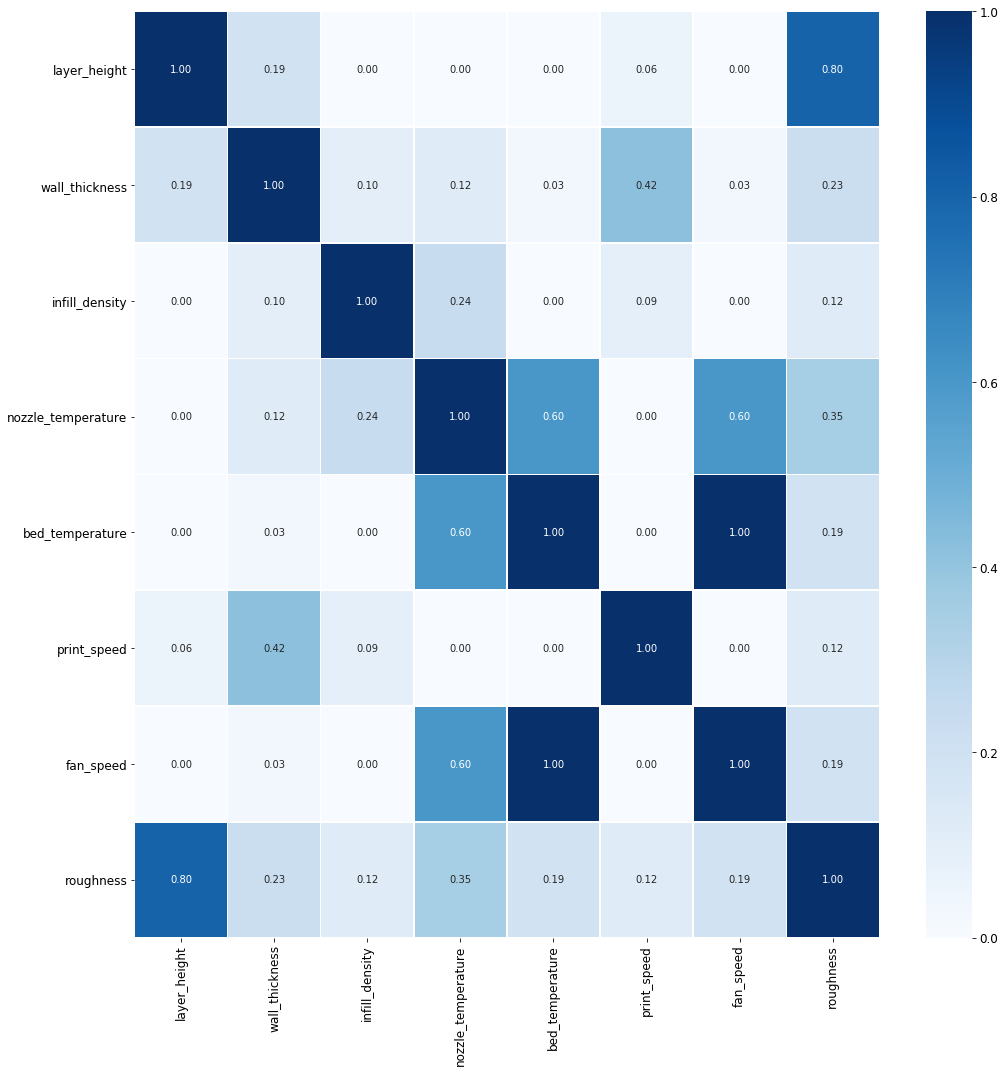

In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data = abs_corr_matrix, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Orange')

save_fig("print_corr_pearson.png")

# elongation

In [2]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'elongation ~ layer_height + wall_thickness + infill_density + infill_pattern + nozzle_temperature + bed_temperature + print_speed + material + fan_speed + roughness', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     12.22
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           5.31e-09
Time:                        14:07:20   Log-Likelihood:                -25.504
No. Observations:                  50   AIC:                             71.01
Df Residuals:                      40   BIC:                             90.13
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0042      0.003      1.633      0.110      -0.001       0.009
infill_pattern[T.honeycomb]    -0.0627      0.133     -0.472      0.640      -0.331       0.206
material[T.pla]                -0.8844      0.880     -1.005      0.321      -2.663       0.894
layer_height                   10.2074      2.554      3.997      0.000       5.046      15.369
wall_thickness                  0.0379      0.026      1.448      0.155      -0.015       0.091
infill_density                  0.0098      0.003      3.539      0.001       0.004       0.015
nozzle_temperature             -0.0643      0.041     -1.580      0.122      -0.146       0.018
bed_temperature                 0.2438      0.150      1.628      0.111      -0.059       0.546
print_speed                    -0.0014      0.003     -0.524      0.603      -0.007       0.004
fan_speed                      -0.0376      0.021     -1.827      0.075      -0.079       0.004
roughness                      -0.0030      0.002     -1.638      0.109      -0.007       0.001
==============================================================================
Omnibus:                        0.428   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.581
Skew:                          -0.083   Prob(JB):                        0.748
Kurtosis:                       2.499   Cond. No.                     6.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

P>|t|(유의확률)은 독립변수의 유의확률
보통 독립변수가 95%의 신뢰도를 가져야 유의미하다고 판단한다. 
이 경우 독립변수의 유의확률은 0.05보다 작은 값이 산출된다. 
즉, 독립변수의 유의확률이 0.05보다 작으면, 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 본다

- layer_height, infill_density

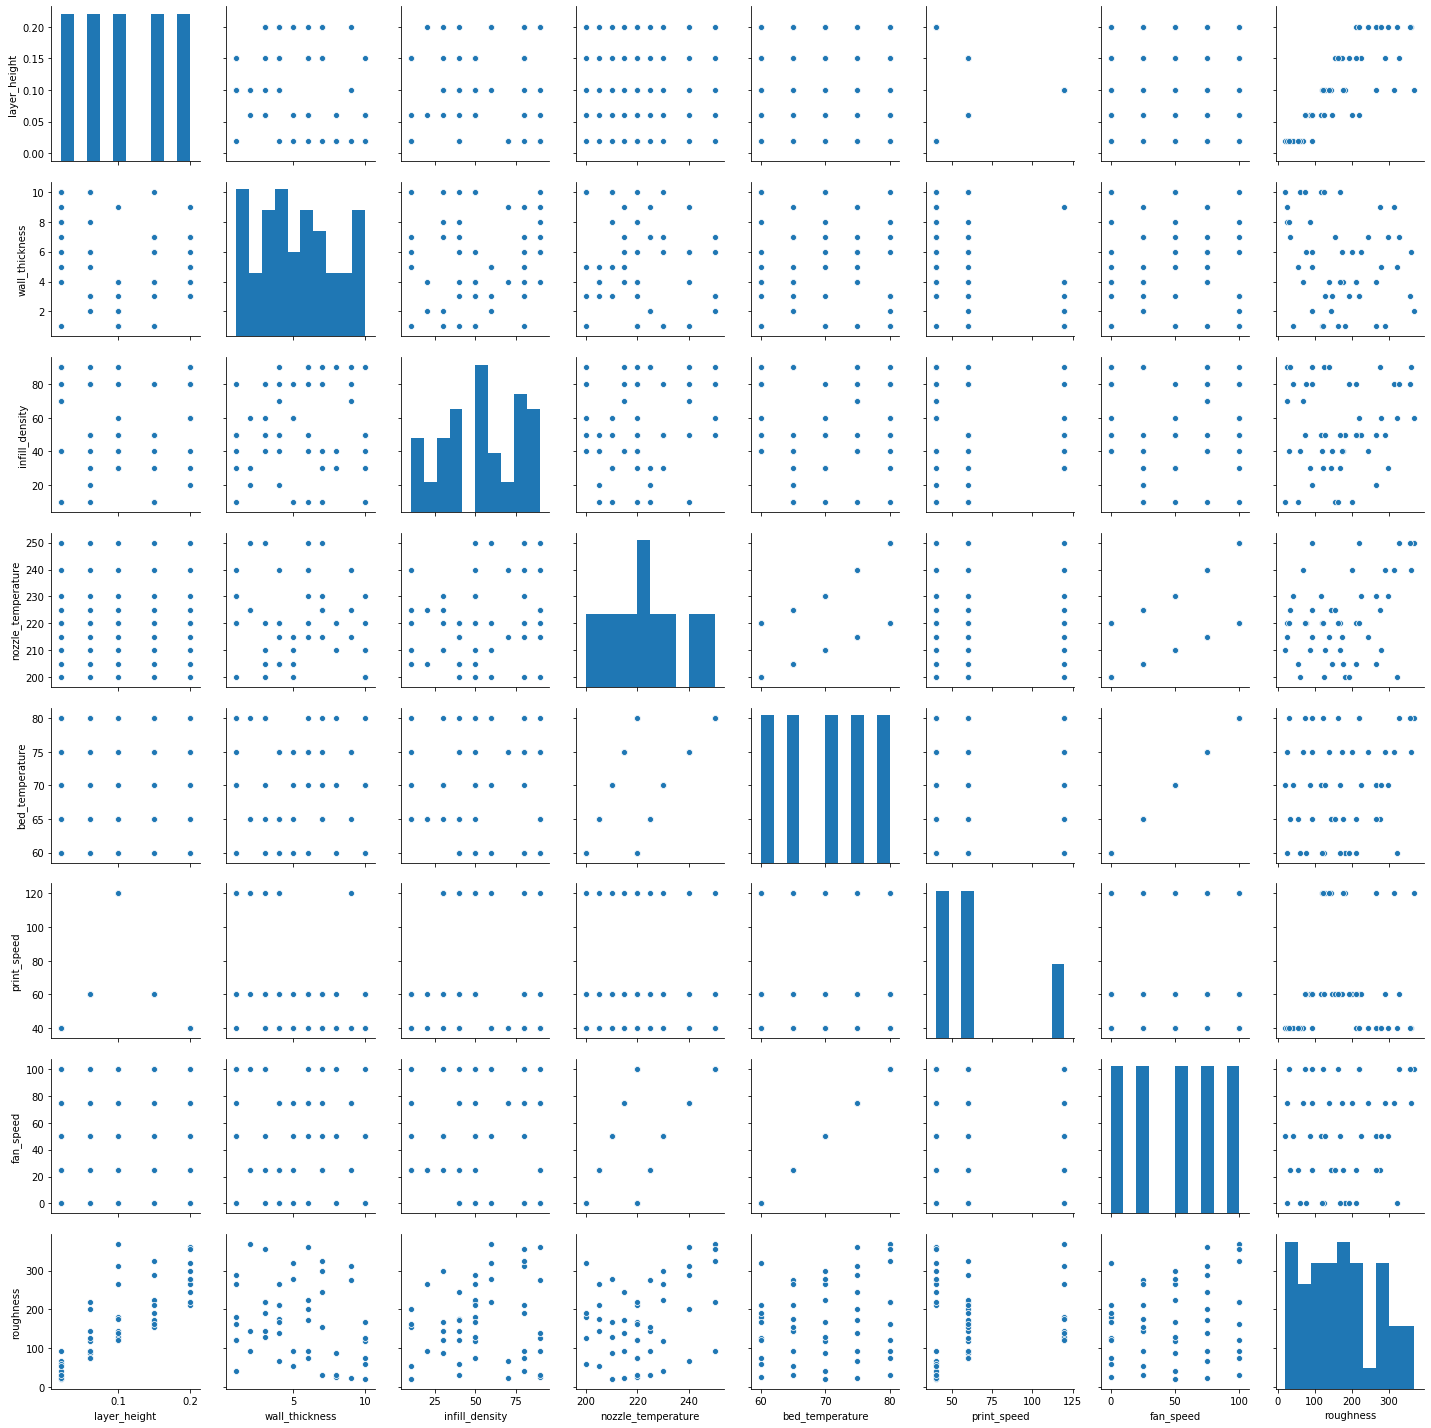

In [4]:
import seaborn as sns
from patsy import dmatrices

sns.pairplot(data[['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern', 'nozzle_temperature','bed_temperature', 'print_speed', 'material', 'fan_speed','roughness']]);




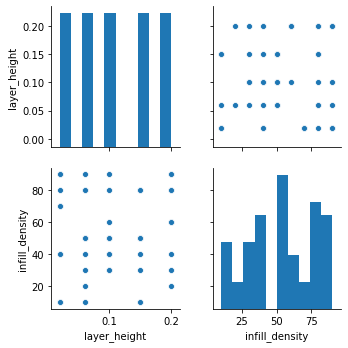

In [5]:
import seaborn as sns
from patsy import dmatrices

sns.pairplot(data[['layer_height', 'infill_density']]);




In [9]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'elongation ~ layer_height + infill_density', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             elongation   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     9.246
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           0.000411
Time:                        07:27:22   Log-Likelihood:                -50.246
No. Observations:                  50   AIC:                             106.5
Df Residuals:                      47   BIC:                             112.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7533      0.277      2.718      0.009       0.196       1.311
layer_height       6.2059      1.512      4.103      0.000       3.163       9.248
infill_density     0.0049      0.004      1.272      0.209      -0.003       0.013
==============================================================================
Omnibus:                        3.101   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.427
Skew:                          -0.400   Prob(JB):                        0.297
Kurtosis:                       2.275   Cond. No.                         931.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Tension_strenght

In [5]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'tension_strenght ~ layer_height + wall_thickness + infill_density + infill_pattern + nozzle_temperature + bed_temperature + print_speed + material + fan_speed + roughness', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tension_strenght   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     9.286
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           1.96e-07
Time:                        12:39:56   Log-Likelihood:                -151.69
No. Observations:                  50   AIC:                             323.4
Df Residuals:                      40   BIC:                             342.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0523      0.032      1.636      0.110      -0.012       0.117
infill_pattern[T.honeycomb]    -1.1446      1.658     -0.690      0.494      -4.495       2.206
material[T.pla]               -12.9304     10.977     -1.178      0.246     -35.116       9.255
layer_height                   74.2045     31.857      2.329      0.025       9.820     138.589
wall_thickness                  1.1029      0.326      3.381      0.002       0.444       1.762
infill_density                  0.1622      0.034      4.715      0.000       0.093       0.232
nozzle_temperature             -0.8261      0.508     -1.628      0.111      -1.852       0.200
bed_temperature                 3.0494      1.868      1.632      0.110      -0.726       6.825
print_speed                    -0.0061      0.034     -0.180      0.858      -0.074       0.062
fan_speed                      -0.4561      0.257     -1.776      0.083      -0.975       0.063
roughness                      -0.0147      0.023     -0.639      0.527      -0.061       0.032
==============================================================================
Omnibus:                        0.250   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.444
Skew:                           0.017   Prob(JB):                        0.801
Kurtosis:                       2.539   Cond. No.                     6.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- layer_height, wall_thickness, infill_density

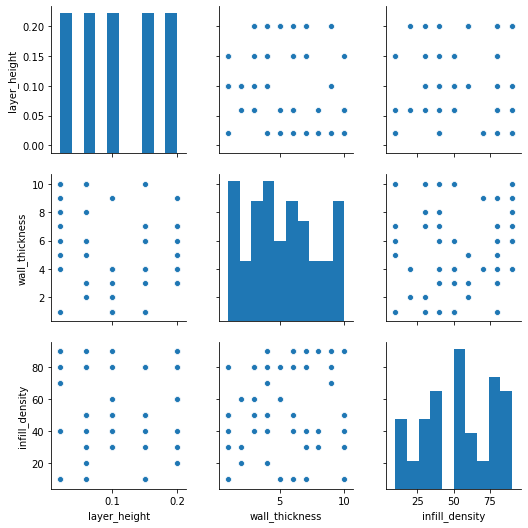

In [7]:
import seaborn as sns
from patsy import dmatrices

sns.pairplot(data[['layer_height', 'wall_thickness', 'infill_density']]);




In [8]:
from statsmodels.regression.linear_model import OLS

result = smf.ols(formula = 'tension_strenght ~ layer_height + wall_thickness + infill_density', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tension_strenght   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     11.78
Date:                Sat, 02 Nov 2019   Prob (F-statistic):           7.53e-06
Time:                        07:25:26   Log-Likelihood:                -165.64
No. Observations:                  50   AIC:                             339.3
Df Residuals:                      46   BIC:                             346.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8465      3.404      0.249      0.805      -6.006       7.699
layer_height      58.7284     15.665      3.749      0.000      27.196      90.261
wall_thickness     1.3729      0.347      3.957      0.000       0.674       2.071
infill_density     0.1094      0.039      2.788      0.008       0.030       0.188
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.129
Skew:                           0.097   Prob(JB):                        0.938
Kurtosis:                       2.844   Cond. No.                         955.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('elongation ~ layer_height + wall_thickness + nozzle_temperature + bed_temperature + material + fan_speed + infill_density', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,0.000000,Intercept
1,29.090281,material[T.pla]
2,1.040541,layer_height
3,1.086298,wall_thickness
4,46.916271,nozzle_temperature
5,inf,bed_temperature
6,inf,fan_speed
7,1.161075,infill_density


- VIF값이 10이상이면 다중공선성 문제
- 독립변수 material, nozzle_temperature을 drop
- bed_temp, fan_speed inf value 이므로 drop

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('elongation ~ layer_height + infill_density', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,8.263236,Intercept
1,1.000012,layer_height
2,1.000012,infill_density


In [13]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('tension_strenght ~ layer_height + wall_thickness +infill_density', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,12.075545,Intercept
1,1.039102,layer_height
2,1.050138,wall_thickness
3,1.011208,infill_density


In [8]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('tension_strenght ~layer_height + wall_thickness + infill_density + infill_pattern + nozzle_temperature + bed_temperature + print_speed + material + fan_speed + roughness', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,Intercept
1,1.087512,infill_pattern[T.honeycomb]
2,47.678983,material[T.pla]
3,6.527792,layer_height
4,1.409784,wall_thickness
5,1.181493,infill_density
6,87.753891,nozzle_temperature
7,inf,bed_temperature
8,1.557856,print_speed
9,inf,fan_speed


In [14]:
corr = data.corr(method = 'pearson')
corr

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000e+00,-0.192571,3.498560e-03,-1.780545e-17,-4.925818e-18,-0.055501,7.881309e-18,0.801341,0.338230,0.507583
wall_thickness,-1.925714e-01,1.000000,1.025762e-01,-1.184929e-01,-2.932662e-02,-0.419531,-2.932662e-02,-0.226987,0.399849,0.176364
infill_density,3.498560e-03,0.102576,1.000000e+00,2.386137e-01,1.600823e-18,-0.094304,2.561317e-18,0.118389,0.358464,0.159009
nozzle_temperature,-1.780545e-17,-0.118493,2.386137e-01,1.000000e+00,6.024534e-01,0.000000,6.024534e-01,0.348611,-0.405908,-0.527447
bed_temperature,-4.925818e-18,-0.029327,1.600823e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
print_speed,-5.550085e-02,-0.419531,-9.430408e-02,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.121066,-0.264590,-0.234052
fan_speed,7.881309e-18,-0.029327,2.561317e-18,6.024534e-01,1.000000e+00,0.000000,1.000000e+00,0.192142,-0.252883,-0.300871
roughness,8.013409e-01,-0.226987,1.183890e-01,3.486108e-01,1.921416e-01,0.121066,1.921416e-01,1.000000,0.051617,0.098962
tension_strenght,3.382296e-01,0.399849,3.584644e-01,-4.059076e-01,-2.528832e-01,-0.264590,-2.528832e-01,0.051617,1.000000,0.838109
elongation,5.075830e-01,0.176364,1.590088e-01,-5.274466e-01,-3.008708e-01,-0.234052,-3.008708e-01,0.098962,0.838109,1.000000


- -1.0과 -0.7 사이이면, 강한 음적 선형관계
- -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- -0.3과 -0.1 사이이면, 약한 음적 선형관계
- -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- +0.1과 +0.3 사이이면, 약한 양적 선형관계
- +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [15]:
corr = data.corr(method = 'spearman')
corr


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000000,-0.201173,-0.000990,0.000000,0.000000,0.000000,0.000000,0.833153,0.351242,0.447381
wall_thickness,-0.201173,1.000000,0.098981,-0.107754,-0.030570,-0.376034,-0.030570,-0.244380,0.425930,0.223615
infill_density,-0.000990,0.098981,1.000000,0.217663,0.005939,-0.179726,0.005939,0.106702,0.324226,0.095512
nozzle_temperature,0.000000,-0.107754,0.217663,1.000000,0.543251,0.000000,0.543251,0.261522,-0.390178,-0.554545
bed_temperature,0.000000,-0.030570,0.005939,0.543251,1.000000,0.000000,1.000000,0.163690,-0.243319,-0.330631
print_speed,0.000000,-0.376034,-0.179726,0.000000,0.000000,1.000000,0.000000,0.127859,-0.238123,-0.184599
fan_speed,0.000000,-0.030570,0.005939,0.543251,1.000000,0.000000,1.000000,0.163690,-0.243319,-0.330631
roughness,0.833153,-0.244380,0.106702,0.261522,0.163690,0.127859,0.163690,1.000000,0.068471,0.083640
tension_strenght,0.351242,0.425930,0.324226,-0.390178,-0.243319,-0.238123,-0.243319,0.068471,1.000000,0.856407
elongation,0.447381,0.223615,0.095512,-0.554545,-0.330631,-0.184599,-0.330631,0.083640,0.856407,1.000000
